In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PowerTransformer
import statsmodels.api as sma

In [109]:
df = pd.read_csv('milk yield.csv')

In [110]:
df

,date,Birth.Date,animal.num,Consumed,Yield,Counsumed.times,Total.Duration,avg.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,04-11-2015,22-02-2006,1010,0.48,9.36,1,216,5.41,1,5.32,4.57,0.00,5.21,8,11,9.702854
1,05-11-2015,22-02-2006,1010,5.39,30.06,2,947,8.56,2,6.84,6.31,6.55,6.45,8,11,9.705594
2,06-11-2015,22-02-2006,1010,7.03,27.01,4,811,7.48,3,6.61,6.68,6.63,6.66,8,11,9.708333
3,07-11-2015,22-02-2006,1010,5.06,24.10,1,663,13.08,4,6.93,6.79,6.68,7.04,8,11,9.711073
4,08-11-2015,22-02-2006,1010,11.69,36.41,3,837,8.01,5,6.70,6.77,6.59,6.71,8,11,9.713813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,01-07-2016,17-12-2005,7046,5.62,20.01,3,461,4.53,134,6.28,7.64,5.99,6.28,7,7,10.544064
37050,02-07-2016,17-12-2005,7046,5.47,18.38,3,545,5.35,135,6.42,6.31,6.00,5.96,7,7,10.546804
37051,03-07-2016,17-12-2005,7046,5.62,19.44,2,436,4.4,136,6.13,6.55,5.73,6.23,7,7,10.549543
37052,04-07-2016,17-12-2005,7046,6.51,22.46,2,386,4.15,137,6.53,6.55,6.22,6.23,7,7,10.552283


In [111]:
# checking the data types

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37054 entries, 0 to 37053
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             37054 non-null  object 
 1   Birth.Date       37054 non-null  object 
 2   animal.num       37054 non-null  int64  
 3   Consumed         37054 non-null  float64
 4   Yield            37054 non-null  float64
 5   Counsumed.times  37054 non-null  int64  
 6   Total.Duration   37054 non-null  int64  
 7   avg.Duration     37052 non-null  object 
 8   DaysInMilk       37054 non-null  int64  
 9   Conductivity.LF  36919 non-null  float64
 10  Conductivity.LR  36655 non-null  float64
 11  Conductivity.RF  36063 non-null  float64
 12  Conductivity.RR  36376 non-null  float64
 13  lactation        37054 non-null  int64  
 14  month            37054 non-null  int64  
 15  age              37054 non-null  float64
dtypes: float64(7), int64(6), object(3)
memory usage: 4.5+ MB


In [113]:
# checking the null values

In [114]:
df.isnull().sum()/len(df)*100

date               0.000000
Birth.Date         0.000000
animal.num         0.000000
Consumed           0.000000
Yield              0.000000
Counsumed.times    0.000000
Total.Duration     0.000000
avg.Duration       0.005398
DaysInMilk         0.000000
Conductivity.LF    0.364333
Conductivity.LR    1.076807
Conductivity.RF    2.674475
Conductivity.RR    1.829762
lactation          0.000000
month              0.000000
age                0.000000
dtype: float64

In [115]:
# dropping the less important variables

In [116]:
df.drop('date',axis=1,inplace=True)

In [117]:
df.drop('Birth.Date',axis=1,inplace=True)

In [118]:
df.drop('avg.Duration',axis=1,inplace=True)

In [119]:
df.drop('animal.num',axis=1,inplace=True)

In [120]:
df

,Consumed,Yield,Counsumed.times,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,0.48,9.36,1,216,1,5.32,4.57,0.00,5.21,8,11,9.702854
1,5.39,30.06,2,947,2,6.84,6.31,6.55,6.45,8,11,9.705594
2,7.03,27.01,4,811,3,6.61,6.68,6.63,6.66,8,11,9.708333
3,5.06,24.10,1,663,4,6.93,6.79,6.68,7.04,8,11,9.711073
4,11.69,36.41,3,837,5,6.70,6.77,6.59,6.71,8,11,9.713813
...,...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,3,461,134,6.28,7.64,5.99,6.28,7,7,10.544064
37050,5.47,18.38,3,545,135,6.42,6.31,6.00,5.96,7,7,10.546804
37051,5.62,19.44,2,436,136,6.13,6.55,5.73,6.23,7,7,10.549543
37052,6.51,22.46,2,386,137,6.53,6.55,6.22,6.23,7,7,10.552283


In [121]:
# converting numerical to categorical for better inference

In [122]:
df['age'] = round(df['age'])

In [123]:
df['age'] = pd.cut(df['age'],bins=[2,5,8,11,16],labels=['young_adult','mid_adult','senior_adult','matured_adult'])

In [124]:
df['age'].fillna(method='ffill',inplace=True)

In [125]:
df[df['Conductivity.LF'].isnull()]

,Consumed,Yield,Counsumed.times,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
1767,4.00,8.27,1,409,3,NaN,6.23,6.86,9.29,6,5,senior_adult
1768,3.31,1.76,1,436,4,NaN,6.78,6.37,9.94,6,5,senior_adult
16145,4.02,6.75,1,166,365,NaN,NaN,NaN,NaN,3,7,mid_adult
21110,0.32,22.83,1,1159,1,NaN,6.55,5.99,5.64,3,1,young_adult
21111,0.98,4.40,1,384,2,NaN,0.00,7.02,0.00,3,1,young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
30807,5.03,24.82,3,608,31,NaN,5.78,5.57,5.75,2,7,young_adult
30808,6.85,28.77,2,711,32,NaN,6.11,6.61,6.22,2,7,young_adult
30809,5.73,27.35,2,635,33,NaN,6.20,6.79,6.50,2,7,young_adult
30810,5.64,27.07,4,558,34,NaN,6.20,6.57,6.42,2,7,young_adult


In [126]:
# as conductivity is related to the type of body of the animal we can impute the median values 
# of conductivity based on age

In [127]:
dict1 = (df.groupby('age')['Conductivity.LF'].median()).to_dict()
for x,y in dict1.items():
    df.loc[(df['age']==x)&(df['Conductivity.LF'].isnull()),'Conductivity.LF'] = y

In [128]:
dict2 = (df.groupby('age')['Conductivity.LR'].median()).to_dict()
for x,y in dict1.items():
    df.loc[(df['age']==x)&(df['Conductivity.LR'].isnull()),'Conductivity.LR'] = y

In [129]:
dict3 = (df.groupby('age')['Conductivity.RF'].median()).to_dict()
for x,y in dict1.items():
    df.loc[(df['age']==x)&(df['Conductivity.RF'].isnull()),'Conductivity.RF'] = y

In [130]:
dict4 = (df.groupby('age')['Conductivity.RR'].median()).to_dict()
for x,y in dict1.items():
    df.loc[(df['age']==x)&(df['Conductivity.RR'].isnull()),'Conductivity.RR'] = y

In [131]:
df.isnull().sum()/len(df)

Consumed           0.0
Yield              0.0
Counsumed.times    0.0
Total.Duration     0.0
DaysInMilk         0.0
Conductivity.LF    0.0
Conductivity.LR    0.0
Conductivity.RF    0.0
Conductivity.RR    0.0
lactation          0.0
month              0.0
age                0.0
dtype: float64

In [132]:
df

,Consumed,Yield,Counsumed.times,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,0.48,9.36,1,216,1,5.32,4.57,0.00,5.21,8,11,senior_adult
1,5.39,30.06,2,947,2,6.84,6.31,6.55,6.45,8,11,senior_adult
2,7.03,27.01,4,811,3,6.61,6.68,6.63,6.66,8,11,senior_adult
3,5.06,24.10,1,663,4,6.93,6.79,6.68,7.04,8,11,senior_adult
4,11.69,36.41,3,837,5,6.70,6.77,6.59,6.71,8,11,senior_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,3,461,134,6.28,7.64,5.99,6.28,7,7,senior_adult
37050,5.47,18.38,3,545,135,6.42,6.31,6.00,5.96,7,7,senior_adult
37051,5.62,19.44,2,436,136,6.13,6.55,5.73,6.23,7,7,senior_adult
37052,6.51,22.46,2,386,137,6.53,6.55,6.22,6.23,7,7,senior_adult


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37054 entries, 0 to 37053
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Consumed         37054 non-null  float64 
 1   Yield            37054 non-null  float64 
 2   Counsumed.times  37054 non-null  int64   
 3   Total.Duration   37054 non-null  int64   
 4   DaysInMilk       37054 non-null  int64   
 5   Conductivity.LF  37054 non-null  float64 
 6   Conductivity.LR  37054 non-null  float64 
 7   Conductivity.RF  37054 non-null  float64 
 8   Conductivity.RR  37054 non-null  float64 
 9   lactation        37054 non-null  int64   
 10  month            37054 non-null  int64   
 11  age              37054 non-null  category
dtypes: category(1), float64(6), int64(5)
memory usage: 3.1 MB


In [134]:
df['lactation'] = pd.cut(df['lactation'],bins=[0,3,6,9],labels=['early lactation','mid lactation','late lactation'])

In [135]:
df['month'] = pd.cut(df['month'],bins=[0,3,5,8,12],labels=['spring','summer','fall','winter'])

In [136]:
df['Counsumed.times'] = pd.cut(df['Counsumed.times'],bins=[0,3,6,9,16],labels=['0-3','3-6','6-9','9-16'])

In [137]:
df

,Consumed,Yield,Counsumed.times,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,lactation,month,age
0,0.48,9.36,0-3,216,1,5.32,4.57,0.00,5.21,late lactation,winter,senior_adult
1,5.39,30.06,0-3,947,2,6.84,6.31,6.55,6.45,late lactation,winter,senior_adult
2,7.03,27.01,3-6,811,3,6.61,6.68,6.63,6.66,late lactation,winter,senior_adult
3,5.06,24.10,0-3,663,4,6.93,6.79,6.68,7.04,late lactation,winter,senior_adult
4,11.69,36.41,0-3,837,5,6.70,6.77,6.59,6.71,late lactation,winter,senior_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,0-3,461,134,6.28,7.64,5.99,6.28,late lactation,fall,senior_adult
37050,5.47,18.38,0-3,545,135,6.42,6.31,6.00,5.96,late lactation,fall,senior_adult
37051,5.62,19.44,0-3,436,136,6.13,6.55,5.73,6.23,late lactation,fall,senior_adult
37052,6.51,22.46,0-3,386,137,6.53,6.55,6.22,6.23,late lactation,fall,senior_adult


In [138]:
df.isnull().sum()

Consumed           0
Yield              0
Counsumed.times    0
Total.Duration     0
DaysInMilk         0
Conductivity.LF    0
Conductivity.LR    0
Conductivity.RF    0
Conductivity.RR    0
lactation          0
month              0
age                0
dtype: int64

In [139]:
# univariate analysis

<Axes: >

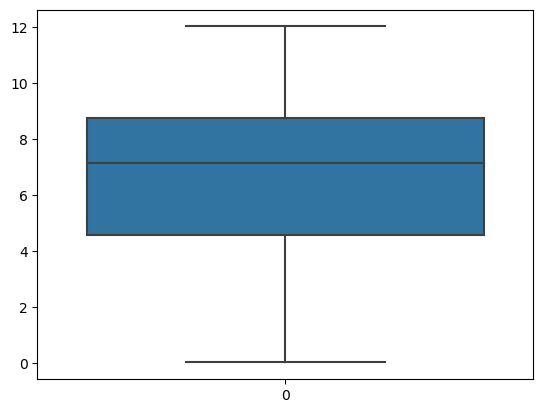

In [140]:
sns.boxplot(df['Consumed'])

In [141]:
df['Consumed'].describe()

count    37054.000000
mean         6.848691
std          2.384935
min          0.020000
25%          4.570000
50%          7.150000
75%          8.737500
max         12.010000
Name: Consumed, dtype: float64

In [142]:
# from the above we can say that 50 percentile of cow's eat less than 7.15 kgs of food everyday
# the average consumption of the cows is around 6.8

In [143]:
# bivariate analysis

<Axes: xlabel='Consumed', ylabel='Yield'>

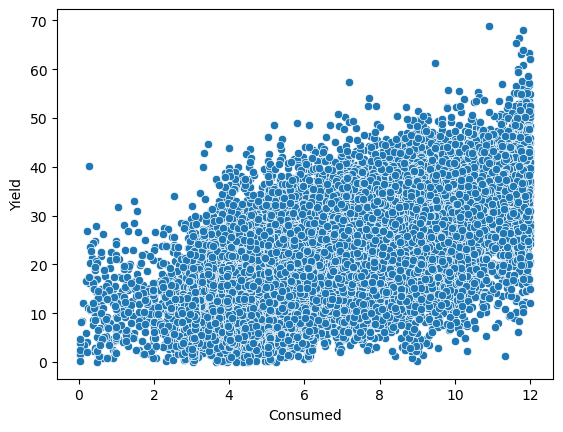

In [144]:
sns.scatterplot(x=df['Consumed'],y=df['Yield'])

In [145]:
# positive correlation between consumed and yield 
# the more food the cows ate the more milk it yielded

<Axes: xlabel='age', ylabel='Yield'>

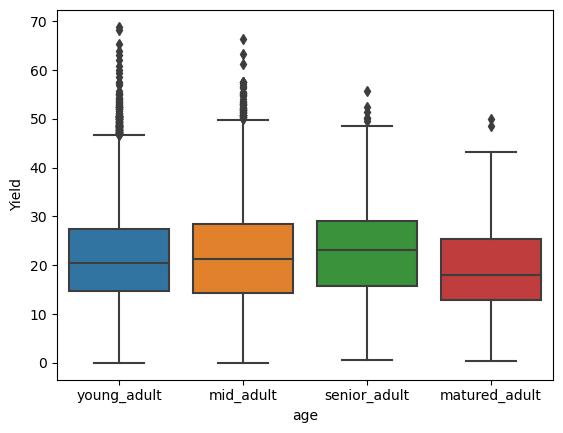

In [146]:
sns.boxplot(x = df['age'],y = df['Yield'])

In [147]:
# the senior adult cows have the most milk yield
# the matured adult cows have the lest milk yield

<Axes: xlabel='month', ylabel='Yield'>

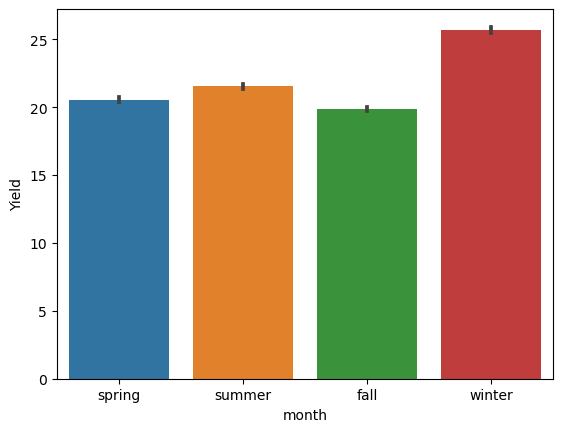

In [148]:
sns.barplot(x = df['month'],y = df['Yield'])

In [149]:
# we can see that the cows produced more milk in the winter season and the least in the fall

<Axes: xlabel='Counsumed.times', ylabel='Yield'>

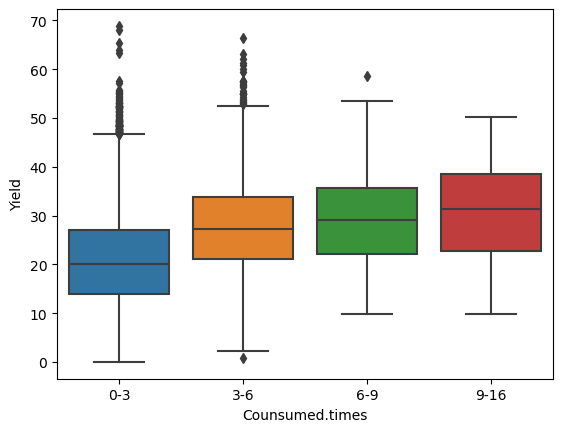

In [150]:
sns.boxplot(x = df['Counsumed.times'],y = df['Yield'])

In [151]:
# we can see that there is a positive correlation between the number of times it consumed the food and the milk yield
# the number of times the cows food consume increases the quantity of the milk also increases

In [152]:
# multivariate analysis

<Axes: xlabel='month', ylabel='Yield'>

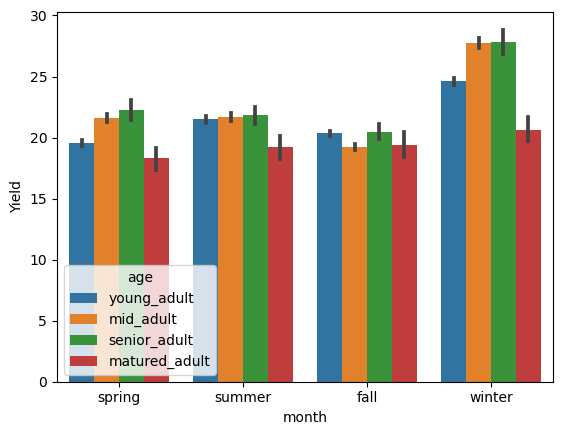

In [153]:
sns.barplot(x = df['month'],y = df['Yield'],hue=df['age'])

In [154]:
# the senior adults have consumed more amount of food

<Axes: >

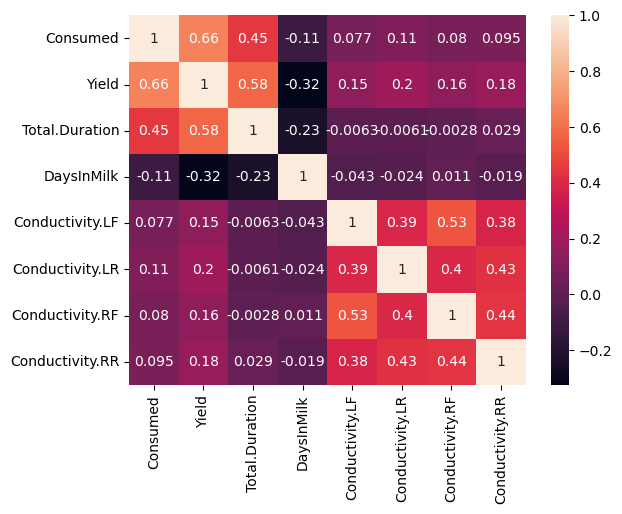

In [155]:
sns.heatmap(df.corr(),annot=True)

In [156]:
df = pd.get_dummies(df,drop_first=True)

In [157]:
x = df.drop('Yield',axis=1)
y = df['Yield']
x = sma.add_constant(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=100)
xtrain.shape,ytrain.shape

((25937, 19), (25937,))

In [158]:
# Ordinary Least Square
model = sma.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     2256.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:53:11   Log-Likelihood:                -83098.
No. Observations:               25937   AIC:                         1.662e+05
Df Residuals:                   25918   BIC:                         1.664e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -7.0684      0.317    -22.331      0.000      -7.689      -6.448
Consumed                     1.9350      0.019    103.215      0.000       1.898       1.972
Total.Duration               0.0080      0.000     68.405      0.000       0.008       0.008
DaysInMilk                  -0.0222      0.000    -45.011      0.000      -0.023      -0.021
Conductivity.LF              0.2139      0.040      5.385      0.000       0.136       0.292
Conductivity.LR              0.6978      0.037     19.044      0.000       0.626       0.770
Conductivity.RF              0.4168      0.045      9.215      0.000       0.328       0.506
Conductivity.RR              0.4195      0.039     10.759      0.000       0.343       0.496
Counsumed.times_3-6          0.4625      0.130      3.560      0.000       0.208       0.717
Counsumed.times_6-9          1.2304      0.450      2.732      0.006       0.348       2.113
Counsumed.times_9-16         1.5459      1.303      1.186      0.235      -1.008       4.100
lactation_mid lactation      0.7663      0.121      6.316      0.000       0.529       1.004
lactation_late lactation    -0.7858      0.277     -2.838      0.005      -1.328      -0.243
month_summer                 0.3940      0.106      3.721      0.000       0.186       0.602
month_fall                   1.9670      0.102     19.344      0.000       1.768       2.166
month_winter                 1.8496      0.120     15.455      0.000       1.615       2.084
age_mid_adult                0.9808      0.112      8.768      0.000       0.762       1.200
age_senior_adult             1.2237      0.210      5.834      0.000       0.813       1.635
age_matured_adult            0.6925      0.311      2.226      0.026       0.083       1.302
==============================================================================
Omnibus:                      417.662   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              778.569
Skew:                          -0.086   Prob(JB):                    8.63e-170
Kurtosis:                       3.831   Cond. No.                     2.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
lr = LinearRegression()
model_bm = lr.fit(xtrain,ytrain)
y_pred_train_bm = model_bm.predict(xtrain)
y_pred_test_bm = model_bm.predict(xtest)

In [160]:
# base model r2
print('r2 score train bm',r2_score(ytrain,y_pred_train_bm))
print('r2 score test bm',r2_score(ytest,y_pred_test_bm))

r2 score train bm 0.6104234630439096
r2 score test bm 0.6031748555729322


In [161]:
# base model rmse
print('rmse train bm',np.sqrt(mean_squared_error(ytrain,y_pred_train_bm)))
print('rmse test bm',np.sqrt(mean_squared_error(ytest,y_pred_test_bm)))

rmse train bm 5.959100775179392
rmse test bm 5.9386376918113095


In [162]:
# lasso
lasso = Lasso()
lasso_model = lasso.fit(xtrain,ytrain)
pred_ytrain = lasso_model.predict(xtrain)
pred_ytest = lasso_model.predict(xtest)
print('rmse train lasso',np.sqrt(mean_squared_error(ytrain,pred_ytrain)))
print('rmse test lasso',np.sqrt(mean_squared_error(ytest,pred_ytest)))
print('r2 score train lasso',r2_score(ytrain,pred_ytrain))
print('r2 score test lasso',r2_score(ytest,pred_ytest))

rmse train lasso 6.1871740500288155
rmse test lasso 6.153291909063232
r2 score train lasso 0.5800321940282369
r2 score test lasso 0.5739696304905271


In [163]:
# ridge
ridge = Ridge()
ridge_model = ridge.fit(xtrain,ytrain)
pred_ytrain = ridge_model.predict(xtrain)
pred_ytest = ridge_model.predict(xtest)
print('rmse train ridge',np.sqrt(mean_squared_error(ytrain,pred_ytrain)))
print('rmse test ridge',np.sqrt(mean_squared_error(ytest,pred_ytest)))
print('r2 score train ridge',r2_score(ytrain,pred_ytrain))
print('r2 score test ridge',r2_score(ytest,pred_ytest))

rmse train ridge 5.959101187895717
rmse test ridge 5.938637512393766
r2 score train ridge 0.6104234090812035
r2 score test ridge 0.603174879550617


In [164]:
# feature selection methods

In [165]:
# sfs forward (rmse)
sfs_forward_bm = SequentialFeatureSelector(estimator=lr,k_features=5,forward='True',scoring='neg_root_mean_squared_error')
sfs_forward_bm.fit(xtrain,ytrain)
sfs_forward_bm.k_score_

-6.08135147268071

In [166]:
# sfs backward (r2)
sfs_backward_bm = SequentialFeatureSelector(estimator=lr,k_features=5,forward='False',scoring='neg_root_mean_squared_error')
sfs_backward_bm.fit(xtrain,ytrain)
sfs_backward_bm.k_score_

-6.08135147268071

In [167]:
# sfs forward (rmse) best
sfs_forward_bm = SequentialFeatureSelector(estimator=lr,k_features='best',forward='True',scoring='neg_root_mean_squared_error')
sfs_forward_bm.fit(xtrain,ytrain)
sfs_forward_bm.k_score_

-5.964672078653235

In [168]:
# sfs backward (rmse) best
sfs_backward_bm = SequentialFeatureSelector(estimator=lr,k_features='best',forward='False',scoring='neg_root_mean_squared_error')
sfs_backward_bm.fit(xtrain,ytrain)
sfs_backward_bm.k_score_

-5.964672078653235

In [169]:
# sfs forward (rmse) range
sfs_forward_bm = SequentialFeatureSelector(estimator=lr,k_features=(1,5),forward='True',scoring='neg_root_mean_squared_error')
sfs_forward_bm.fit(xtrain,ytrain)
sfs_forward_bm.k_score_

-6.08135147268071

In [170]:
# Recurssive feature elimination
rfe = RFE(estimator=lr,n_features_to_select=5)
rfe.fit(xtrain,ytrain)
features = pd.Series(rfe.ranking_,index=xtrain.columns)
impfeature_rfe = features[features==1].index
impfeature_rfe

Index(['Consumed', 'Counsumed.times_9-16', 'lactation_late lactation',
       'month_winter', 'age_matured_adult'],
      dtype='object')

In [171]:
xtrain_rfe = xtrain.loc[:,impfeature_rfe]
xtest_rfe = xtest.loc[:,impfeature_rfe]

In [172]:
model_bm_rf = lr.fit(xtrain_rfe,ytrain)
pred_ytest_rfe = model_bm_rf.predict(xtest_rfe)
print('rmse test rf',np.sqrt(mean_squared_error(ytest,pred_ytest_rfe)))

rmse test rf 6.94295813527631


In [173]:
# as the model did not improve 

In [174]:
q1 =df.quantile(0.25)
q3= df.quantile(0.75)
iqr=q3-q1
upper_limit= q3+1.5*iqr
lower_limit= q1-1.5*iqr
df_ot = df[~((df < (lower_limit)) | (df > (upper_limit))).any(axis=1)]

In [175]:
df_ot

,Consumed,Yield,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,Counsumed.times_3-6,Counsumed.times_6-9,Counsumed.times_9-16,lactation_mid lactation,lactation_late lactation,month_summer,month_fall,month_winter,age_mid_adult,age_senior_adult,age_matured_adult
1869,9.04,31.01,1191,45,6.07,6.39,6.23,7.17,0,0,0,1,0,0,0,0,1,0,0
1870,4.42,24.17,912,46,6.57,6.64,6.48,7.36,0,0,0,1,0,0,0,0,1,0,0
1871,8.90,39.32,1376,47,6.59,6.70,6.64,7.31,0,0,0,1,0,0,0,0,1,0,0
1872,4.52,23.78,1031,48,6.42,6.78,6.31,6.61,0,0,0,1,0,0,0,0,1,0,0
1874,4.57,24.02,639,50,6.96,6.85,6.61,6.98,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36917,5.35,13.41,662,237,6.02,5.80,6.02,5.92,0,0,0,0,0,0,1,0,0,0,0
36918,6.14,17.66,797,238,6.28,5.82,6.24,5.90,0,0,0,0,0,0,1,0,0,0,0
36919,5.39,14.51,807,239,5.78,5.85,5.83,5.68,0,0,0,0,0,0,1,0,0,0,0
36920,3.04,19.20,1094,240,6.18,6.00,6.19,5.95,0,0,0,0,0,0,1,0,0,0,0


In [176]:
x = df_ot.drop('Yield',axis=1)
y = df_ot['Yield']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=100)

In [177]:
lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
y_pred_train = model.predict(xtrain)
y_pred_test = model.predict(xtest)

In [178]:
# rmse values after outlier treatment

In [179]:
print('rmse train ',np.sqrt(mean_squared_error(ytrain,y_pred_train)))
print('rmse test ',np.sqrt(mean_squared_error(ytest,y_pred_test)))

rmse train  5.443276095124621
rmse test  5.373225290872762


In [180]:
df

,Consumed,Yield,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,Counsumed.times_3-6,Counsumed.times_6-9,Counsumed.times_9-16,lactation_mid lactation,lactation_late lactation,month_summer,month_fall,month_winter,age_mid_adult,age_senior_adult,age_matured_adult
0,0.48,9.36,216,1,5.32,4.57,0.00,5.21,0,0,0,0,1,0,0,1,0,1,0
1,5.39,30.06,947,2,6.84,6.31,6.55,6.45,0,0,0,0,1,0,0,1,0,1,0
2,7.03,27.01,811,3,6.61,6.68,6.63,6.66,1,0,0,0,1,0,0,1,0,1,0
3,5.06,24.10,663,4,6.93,6.79,6.68,7.04,0,0,0,0,1,0,0,1,0,1,0
4,11.69,36.41,837,5,6.70,6.77,6.59,6.71,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,5.62,20.01,461,134,6.28,7.64,5.99,6.28,0,0,0,0,1,0,1,0,0,1,0
37050,5.47,18.38,545,135,6.42,6.31,6.00,5.96,0,0,0,0,1,0,1,0,0,1,0
37051,5.62,19.44,436,136,6.13,6.55,5.73,6.23,0,0,0,0,1,0,1,0,0,1,0
37052,6.51,22.46,386,137,6.53,6.55,6.22,6.23,0,0,0,0,1,0,1,0,0,1,0


In [181]:
x = df.drop('Yield',axis=1)
y = df['Yield']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=100)

In [182]:
ytrain = pd.DataFrame(ytrain)
ytest = pd.DataFrame(ytest)

In [183]:
columns_to_trans = ['Consumed','Total.Duration','DaysInMilk','Conductivity.LF','Conductivity.LR','Conductivity.RR']

In [184]:
for i in columns_to_trans:
    pt = PowerTransformer()
    xtrain[i] = pt.fit_transform(xtrain[[i]])

In [185]:
for i in columns_to_trans:
    pt = PowerTransformer()
    xtest[i] = pt.fit_transform(xtest[[i]])

In [186]:
ytrain = pt.fit_transform(ytrain)

In [187]:
ytest = pt.fit_transform(ytest)

In [188]:
lr = LinearRegression()
model_trans = lr.fit(xtrain,ytrain)
y_pred_train_trans = model_trans.predict(xtrain)
y_pred_test_trans = model_trans.predict(xtest)

In [189]:
# rmse values after transformation

In [190]:
print('rmse train trans',np.sqrt(mean_squared_error(ytrain,y_pred_train_trans)))
print('rmse test trans',np.sqrt(mean_squared_error(ytest,y_pred_test_trans)))

rmse train trans 0.6154373830933669
rmse test trans 0.6268560059539304


In [191]:
df_ot

,Consumed,Yield,Total.Duration,DaysInMilk,Conductivity.LF,Conductivity.LR,Conductivity.RF,Conductivity.RR,Counsumed.times_3-6,Counsumed.times_6-9,Counsumed.times_9-16,lactation_mid lactation,lactation_late lactation,month_summer,month_fall,month_winter,age_mid_adult,age_senior_adult,age_matured_adult
1869,9.04,31.01,1191,45,6.07,6.39,6.23,7.17,0,0,0,1,0,0,0,0,1,0,0
1870,4.42,24.17,912,46,6.57,6.64,6.48,7.36,0,0,0,1,0,0,0,0,1,0,0
1871,8.90,39.32,1376,47,6.59,6.70,6.64,7.31,0,0,0,1,0,0,0,0,1,0,0
1872,4.52,23.78,1031,48,6.42,6.78,6.31,6.61,0,0,0,1,0,0,0,0,1,0,0
1874,4.57,24.02,639,50,6.96,6.85,6.61,6.98,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36917,5.35,13.41,662,237,6.02,5.80,6.02,5.92,0,0,0,0,0,0,1,0,0,0,0
36918,6.14,17.66,797,238,6.28,5.82,6.24,5.90,0,0,0,0,0,0,1,0,0,0,0
36919,5.39,14.51,807,239,5.78,5.85,5.83,5.68,0,0,0,0,0,0,1,0,0,0,0
36920,3.04,19.20,1094,240,6.18,6.00,6.19,5.95,0,0,0,0,0,0,1,0,0,0,0


In [192]:
x = df_ot.drop('Yield',axis=1)
y = df_ot['Yield']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.70,random_state=100)

In [193]:
ytrain = pd.DataFrame(ytrain)
ytest = pd.DataFrame(ytest)

In [194]:
for i in columns_to_trans:
    pt = PowerTransformer()
    xtrain[i] = pt.fit_transform(xtrain[[i]])

In [195]:
for i in columns_to_trans:
    pt = PowerTransformer()
    xtest[i] = pt.fit_transform(xtest[[i]])

In [196]:
ytrain = pt.fit_transform(ytrain)

In [197]:
ytest = pt.fit_transform(ytest)

In [198]:
lr = LinearRegression()
model_trans = lr.fit(xtrain,ytrain)
y_pred_train_trans_ot = model_trans.predict(xtrain)
y_pred_test_trans_ot = model_trans.predict(xtest)

In [199]:
# rmse values after outlier treatment and transformation

In [200]:
print('rmse train trans ot',np.sqrt(mean_squared_error(ytrain,y_pred_train_trans_ot)))
print('rmse test trans ot',np.sqrt(mean_squared_error(ytest,y_pred_test_trans_ot)))

rmse train trans ot 0.6347109382803119
rmse test trans ot 0.6205577319920444


In [201]:
xtrain = sma.add_constant(xtrain)
model = sma.OLS(ytrain,xtrain).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1975.
Date:                Fri, 25 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:54:07   Log-Likelihood:                -14149.
No. Observations:               14672   AIC:                         2.832e+04
Df Residuals:                   14660   BIC:                         2.841e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.1377      0.101     -1.364      0.173      -0.336       0.060
Consumed                     0.4139      0.006     64.192      0.000       0.401       0.426
Total.Duration               0.4127      0.006     64.979      0.000       0.400       0.425
DaysInMilk                  -0.1867      0.006    -33.672      0.000      -0.198      -0.176
Conductivity.LF              0.0603      0.009      6.588      0.000       0.042       0.078
Conductivity.LR              0.0578      0.009      6.452      0.000       0.040       0.075
Conductivity.RF              0.0007      0.016      0.042      0.967      -0.030       0.032
Conductivity.RR             -0.0084      0.009     -0.942      0.346      -0.026       0.009
Counsumed.times_3-6       2.413e-17   4.09e-18      5.901      0.000    1.61e-17    3.21e-17
Counsumed.times_6-9       8.058e-18   2.54e-18      3.172      0.002    3.08e-18     1.3e-17
Counsumed.times_9-16     -1.341e-17   2.48e-18     -5.412      0.000   -1.83e-17   -8.55e-18
lactation_mid lactation      0.0827      0.016      5.120      0.000       0.051       0.114
lactation_late lactation          0          0        nan        nan           0           0
month_summer                 0.0491      0.014      3.559      0.000       0.022       0.076
month_fall                   0.1940      0.014     14.364      0.000       0.168       0.221
month_winter                      0          0        nan        nan           0           0
age_mid_adult                0.0459      0.015      3.104      0.002       0.017       0.075
age_senior_adult                  0          0        nan        nan           0           0
age_matured_adult                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                      228.639   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.675
Skew:                          -0.264   Prob(JB):                     6.75e-57
Kurtosis:                       3.379   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [202]:
print('RMSE basemodel 5.938637691811308')
print('RMSE test lasso 6.153291909063232')
print('RMSE test ridge 5.938637512393766')
print('RMSE sfs(5) forward -6.08135147268071')
print('RMSE sfs(5) backward -6.08135147268071')
print('RMSE sfs forward best -5.964672078653235')
print('RMSE sfs backward best -5.964672078653235')
print('RMSE sfs forward range -6.08135147268071')
print('RMSE rf 6.94295813527631')
print('RMSE test after outlier treatment 5.373225290872762')
print('RMSE test after trans  0.6268560059539304')
print('RMSE test outlier treatment and trans 0.6205577319920444')

RMSE basemodel 5.938637691811308
RMSE test lasso 6.153291909063232
RMSE test ridge 5.938637512393766
RMSE sfs(5) forward -6.08135147268071
RMSE sfs(5) backward -6.08135147268071
RMSE sfs forward best -5.964672078653235
RMSE sfs backward best -5.964672078653235
RMSE sfs forward range -6.08135147268071
RMSE rf 6.94295813527631
RMSE test after outlier treatment 5.373225290872762
RMSE test after trans  0.6268560059539304
RMSE test outlier treatment and trans 0.6205577319920444
